<a href="https://colab.research.google.com/github/Dywinar/Research-Pandas-Polaris-2.-duckdb/blob/main/Research_Pandas%2C_Polaris%2C_2_duckdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import psutil
import random
import polars as pl
import duckdb
num_rows = 10**6
data = {
    'A': np.random.rand(num_rows),
    'B': np.random.rand(num_rows),
    'C': np.random.randint(0, 100, size=num_rows),
    'D': np.random.choice(['cat', 'dog', 'bird', 'fish'], size=num_rows)
}

df = pd.DataFrame(data)
df.head(10)

,A,B,C,D
0,0.590422,0.490017,76,fish
1,0.717495,0.129750,3,cat
2,0.656930,0.397675,80,dog
3,0.090444,0.580575,31,cat
4,0.547369,0.685215,56,dog
5,0.870832,0.533237,82,dog
6,0.178939,0.033657,48,cat
7,0.410006,0.141484,11,bird
8,0.106111,0.078126,4,fish
9,0.719621,0.358213,72,bird


In [ ]:
file_path = 'large_file.csv'
df.to_csv(file_path, index=False)

In [ ]:
def memory_usage_psutil():
    """Получение текущего использования памяти процесса"""
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss / (1024 ** 2)  # в мегабайтах
    return mem

In [ ]:
def time_decorator(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    load_time = end_time - start_time
    return load_time
  return wrapper

Половина пройдена
Половина пройдена
Половина пройдена


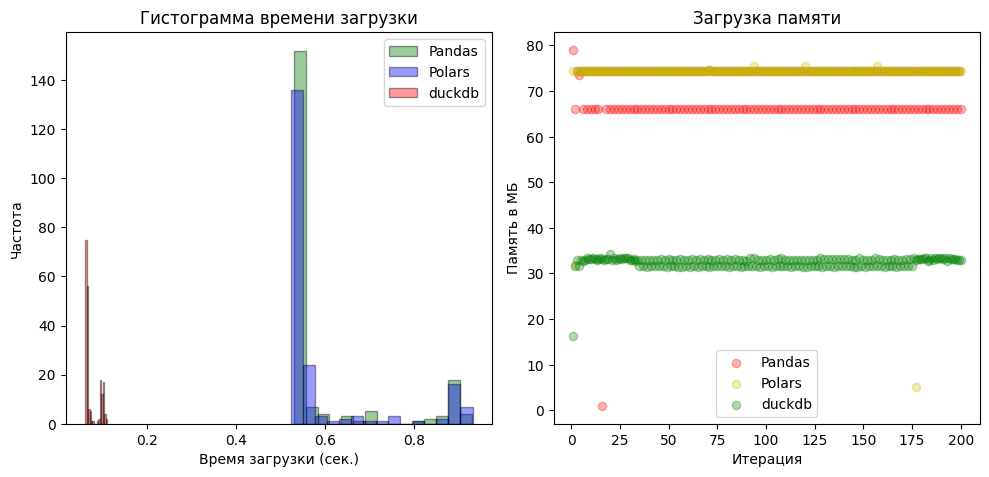

In [ ]:
def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()

    df = pd.read_csv(file_path)

    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem

    return load_time, mem_usage

file_path = 'large_file.csv'
ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, mem_usage])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)
fig, ax = plt.subplots(1,2,  figsize=(10, 5))
ax[0].hist(ls[:,1], bins=15, color='g', edgecolor='black', alpha=0.4, label='Pandas')
ax[0].set_xlabel('Время загрузки (сек.)')
ax[0].set_ylabel('Частота')
ax[0].set_title('Гистограмма времени загрузки')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='r', label ='Pandas', alpha=0.3)
ax[1].set_xlabel('Итерация')
ax[1].set_ylabel('Память в МБ')
ax[1].set_title('Загрузка памяти')
def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()
    df = pd.read_csv(file_path)
    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem
    return load_time, mem_usage

ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, abs(mem_usage)])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)
ax[0].hist(ls[:,1], bins=15, color='b', edgecolor='black', alpha=0.4, label='Polars')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='y', label ='Polars', alpha=0.3)

def load_and_measure(file_path):
    """Функция для загрузки файла и измерения времени и использования памяти"""
    start_time = time.time()
    start_mem = memory_usage_psutil()
    cont = duckdb.connect()
    df = cont.execute("""
        SELECT *
        FROM '/content/large_file.csv'
    """)
    end_time = time.time()
    end_mem = memory_usage_psutil()

    load_time = end_time - start_time
    mem_usage = end_mem - start_mem
    return load_time, mem_usage

ls = []
for i in range(1,201):
    load_time, mem_usage = load_and_measure(file_path)
    ls.append([i, load_time, abs(mem_usage)])
    if i == 50:
      print('Половина пройдена')
ls = np.array(ls)

ax[0].hist(ls[:,1], bins=15, color='r', edgecolor='black', alpha=0.4, label='duckdb')
ax[1].scatter(ls[:, 0], ls[:, 2],  color='g', label ='duckdb', alpha=0.3)

ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
@time_decorator
def sum_mean_max_min_pd(x: str) -> float:
    """Функция вычисления скорости разных функций Pandas"""
    result = df[['A', 'B', 'C']].apply(x)
func = ['sum', 'mean', 'max', 'min']
df = pd.read_csv(file_path)
ls = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_pd(func[q])
    lq.append(load_time)
  ls.append(lq)

In [ ]:
@time_decorator
def sum_mean_max_min_plr(x: str) -> float:
    """Функция вычисления скорости разных функций Polars"""
    if x == 'sum':
       result = df.select(["A", "B", 'C']).sum()
    elif x == 'min':
      result = df.select(["A", "B", 'C']).min()
    elif x == 'mean':
      result = df.select(["A", "B", 'C']).mean()
    elif x == 'max':
      result =  df.select(["A", "B", 'C']).max()

func = ['sum', 'mean', 'max', 'min']
df = pl.read_csv(file_path)
ls_1 = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_plr(func[q])
    lq.append(load_time)
  ls_1.append(lq)

In [ ]:
@time_decorator
def sum_mean_max_min_duckdb(x: str) -> float:
    """Функция вычисления скорости разных функций duckdb"""
    if x == 'sum':
      df = cont.execute("""
        SELECT SUM(A), SUM(B), SUM(C)
        FROM large_data
    """)
    elif x == 'min':
      df = cont.execute("""
        SELECT MIN(A), MIN(B), MIN(C)
        FROM large_data
    """)
    elif x == 'mean':
      df = cont.execute("""
        SELECT MEAN(A), MEAN(B), MEAN(C)
        FROM large_data
    """)

    elif x == 'max':
      df = cont.execute("""
        SELECT MAX(A), MAX(B), MAX(C)
        FROM large_data
    """)
cont = duckdb.connect()


cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2 = []
for q in range(len(func)):
  lq = []
  for i in range(1,5000):
    load_time = sum_mean_max_min_duckdb(func[q])
    lq.append(load_time)
  ls_2.append(lq)

In [ ]:
lst[0][0, :]

array([0.01735234, 0.01284361, 0.012712  , ..., 0.01209903, 0.01351476,
       0.01592541])

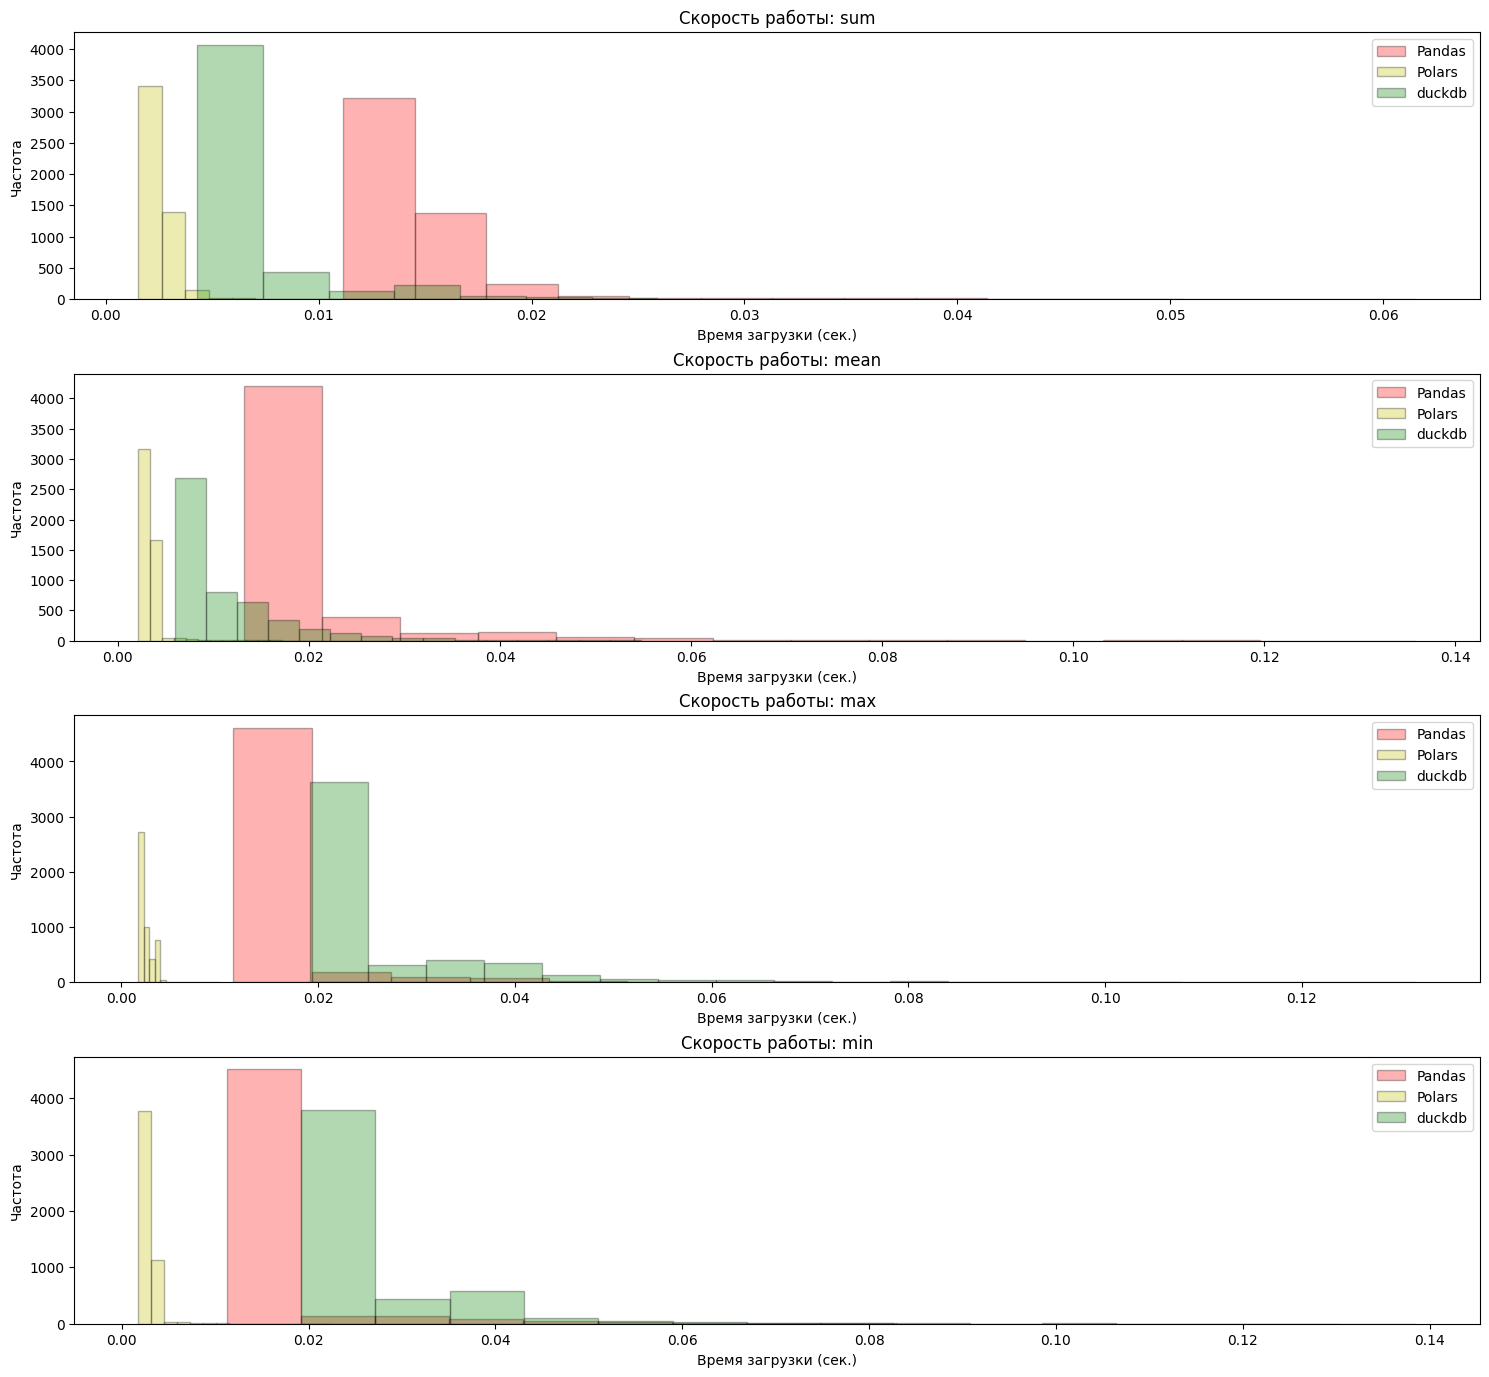

In [ ]:

ls = np.array(ls)
ls_1 = np.array(ls_1)
ls_2 = np.array(ls_2)
lst = [ls, ls_1, ls_2]
cl = [['r', 'y', 'g', 'b'] for i in range(4)]
fig, ax = plt.subplots(4,1,  figsize=(15,15))
names = ['Pandas', 'Polars', 'duckdb']
for q in range(len(func)):
  for i in range(len(lst)):
    ax[q].hist(lst[i][q, :], bins=15, color=cl[q][i], edgecolor='black', label=names[i],  alpha=0.3)
  ax[q].set_ylabel('Частота')
  ax[q].set_xlabel('Время загрузки (сек.)')
  ax[q].set_title(f'Скорость работы: {func[q]}')
  ax[q].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
cont.close()

In [ ]:
@time_decorator
def filter_data_pd():
  """Функция вычисления скорости фильтрации данных Pandas """
  result = df[df['A'] > 0.9]
  result_1 = df[df['B'] < 0.1]
  result_2 = df[df['C'] == 10]
  result_3 = df[df['D']== 'dog']
filter_data_pd.__doc__

In [ ]:
df = pd.read_csv(file_path)
ls_1 = []
for i in range(1, 2501):
  ls_1.append(filter_data_pd())
  print(i) if i % 100 == 0 else None

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [ ]:
@time_decorator
def filter_data_plr():
  """Функция вычисления скорости фильтрации данных Polars """
  result = df.filter(pl.col('A') > 0.9)
  result_1 = df.filter(pl.col('B') < 0.1)
  result_2 = df.filter(pl.col('C') == 10)
  result_3 = df.filter(pl.col('D') == 'dog')
filter_data_plr.__doc__

In [ ]:
df = pl.read_csv(file_path)
ls = []
for i in range(1, 2501):
  ls.append(filter_data_plr())
  print(i) if i % 100 == 0 else None

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [ ]:
@time_decorator
def filter_data_duckdb():
  """Функция вычисления скорости фильтрации данных duckdb """
  result = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE A > 0.9
      """
  )

  result_1 = cont.execute(
      """
      SELECT *
      FROM large_data
      WHERE B < 0.1
      """
  )

  result_2 = cont.execute(
        """
        SELECT *
        FROM large_data
        WHERE C = 10
        """
    )
  result_2 = cont.execute(
          """
          SELECT *
          FROM large_data
          WHERE D = 'dog'
          """
  )

filter_data_duckdb.__doc__

In [ ]:
cont = duckdb.connect()
cont.execute("""
    CREATE TABLE large_data AS
    SELECT * FROM read_csv_auto('/content/large_file.csv')
""")
ls_2 = []
for i in range(1, 2501):
  ls_2.append(filter_data_duckdb())
  print(i) if i % 100 == 0 else None

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


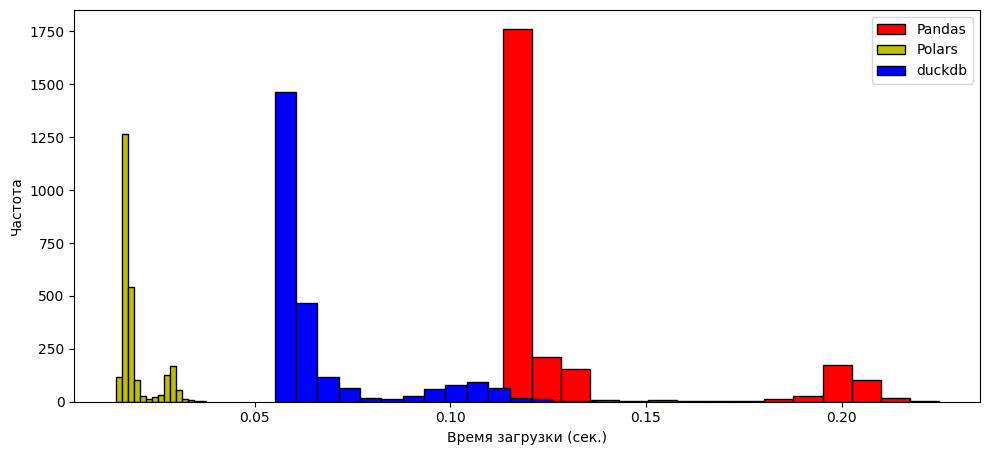

In [ ]:
lst = [ls_1, ls, ls_2]
plt.figure(figsize=(10, 5))
name = ['Pandas', 'Polars', 'duckdb']
cl = ['r', 'y', 'b']
for i in range(len(lst)):
  plt.hist(lst[i], bins=15, color=cl[i],edgecolor='black', label=name[i])
  plt.xlabel('Время загрузки (сек.)')
  plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()